#Ornamental Plants Image Classification

## Name: Kavin Fidel J

## ID: 210100007

In [1]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(41)
import numpy as np
np.random.seed(41)
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image
from numpy import save

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
X = []
y = []


In [4]:
# Taking 40%  of the images from each folder
dam_rose = glob.glob("/content/drive/MyDrive/Ornamental_Plants/Damask Rose/*.jpeg")
rain_lily = glob.glob("/content/drive/MyDrive/Ornamental_Plants/Rain Lily/*.jpeg")
echeveria = glob.glob("/content/drive/MyDrive/Ornamental_Plants/Echeveria Flower/*.jpg")
mirabilis = glob.glob("/content/drive/MyDrive/Ornamental_Plants/Mirabilis Jalapa/*.jpg")
zinnia = glob.glob("/content/drive/MyDrive/Ornamental_Plants/Zinnia Elegans/*.jpg")

total_drose = len(dam_rose)
total_rlily = len(rain_lily)
total_eflower = len(echeveria)
total_mjalapa = len(mirabilis)
total_zelegans = len(zinnia)


ImgFiles = dam_rose[:round(0.4*total_drose)] + rain_lily[:round(0.4*total_rlily)] + echeveria[:round(0.4*total_eflower)] + mirabilis[:round(0.4*total_mjalapa)] + zinnia[:round(0.4*total_zelegans)]

for items in ImgFiles[:5]:
    print(items)


/content/drive/MyDrive/Ornamental_Plants/Damask Rose/Damask Rose (463).jpeg
/content/drive/MyDrive/Ornamental_Plants/Damask Rose/Damask Rose (112).jpeg
/content/drive/MyDrive/Ornamental_Plants/Damask Rose/Damask Rose (406).jpeg
/content/drive/MyDrive/Ornamental_Plants/Damask Rose/Damask Rose (464).jpeg
/content/drive/MyDrive/Ornamental_Plants/Damask Rose/Damask Rose (184).jpeg


In [5]:
for filename in ImgFiles:
  X_i = Image.open(filename)
  X_i = X_i.resize((299,299))
  X_i = np.array(X_i)/255.0

  X.append(X_i)
  label = filename.split("/")
  y_i = label[-2]
  y.append(y_i)

In [6]:
print(set(y))
print(len(y))

{'Damask Rose', 'Mirabilis Jalapa', 'Echeveria Flower', 'Rain Lily', 'Zinnia Elegans'}
850


In [7]:

from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)

print(set(y))
print(lEncoder.classes_)

{0, 1, 2, 3, 4}
['Damask Rose' 'Echeveria Flower' 'Mirabilis Jalapa' 'Rain Lily'
 'Zinnia Elegans']


In [8]:


X = np.array(X)

y = np.array(y)

print(X.shape)
print(y.shape)

(850, 299, 299, 3)
(850,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify = y,
                                                    random_state=42)


print("X_train_shape: {}".format(X_train.shape))
print("X_test_shape: {}".format(X_test.shape))

X_train_shape: (637, 299, 299, 3)
X_test_shape: (213, 299, 299, 3)


In [10]:

mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train-mu)/std
X_test_std = (X_test-mu)/std

In [11]:
base_model = keras.applications.EfficientNetV2B0(
                include_top=False,
                weights="imagenet"
)

# Freeze the weights - will not be updated during backpropagation
for layer in base_model.layers:
  layer.trainable = False

# Adding classifier
global_pool = keras.layers.GlobalAveragePooling2D()(base_model.output)

x = keras.layers.BatchNormalization()(global_pool)
x = keras.layers.Dropout(0.35)(x)

output_ = keras.layers.Dense(units=5, activation='softmax')(x)

model2_TL = keras.models.Model(inputs=[base_model.input], outputs=[output_])

24274472/24274472 [==============================] - 0s 0us/step


In [12]:
model2_TL.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks2_TL = [
             keras.callbacks.ModelCheckpoint("bestTL2.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history2_TL = model2_TL.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks2_TL)

Epoch 1/10
36/36 [==============================] - 20s 178ms/step - loss: 1.5079 - accuracy: 0.3997 - val_loss: 1.4965 - val_accuracy: 0.2031
Epoch 2/10
36/36 [==============================] - 3s 79ms/step - loss: 1.1063 - accuracy: 0.5497 - val_loss: 1.4525 - val_accuracy: 0.2344
Epoch 3/10
36/36 [==============================] - 3s 82ms/step - loss: 0.9567 - accuracy: 0.6230 - val_loss: 1.3896 - val_accuracy: 0.3281
Epoch 4/10
36/36 [==============================] - 3s 88ms/step - loss: 0.9806 - accuracy: 0.6091 - val_loss: 1.3580 - val_accuracy: 0.3594
Epoch 5/10
36/36 [==============================] - 3s 93ms/step - loss: 0.8416 - accuracy: 0.6492 - val_loss: 1.2652 - val_accuracy: 0.3906
Epoch 6/10
36/36 [==============================] - 4s 105ms/step - loss: 0.8054 - accuracy: 0.6946 - val_loss: 1.2403 - val_accuracy: 0.4062
Epoch 7/10
36/36 [==============================] - 3s 97ms/step - loss: 0.7701 - accuracy: 0.6963 - val_loss: 1.1647 - val_accuracy: 0.4688
Epoch 8/10

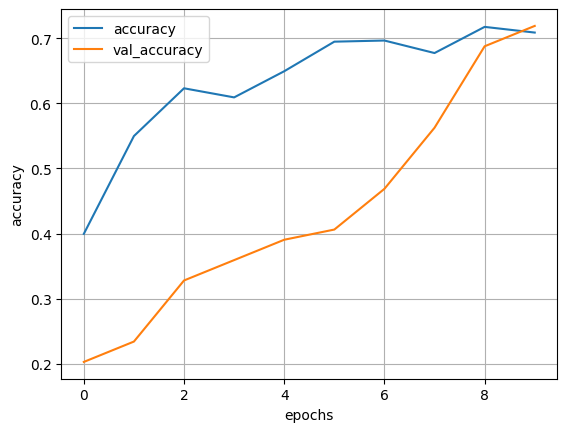

In [13]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history2_TL.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [14]:
y_proba = model2_TL.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

7/7 [==============================] - 4s 209ms/step
[4 4 2 2 2 0 4 0 1 2 1 1 1 1 1 4 0 2 2 2 1 0 2 2 4 1 1 1 0 4 1 2 1 1 1 2 2
 4 0 0 1 2 2 2 2 1 1 3 2 4 1 3 2 1 3 1 1 0 2 1 2 1 1 0 1 2 0 2 1 1 3 3 4 3
 1 2 2 1 1 1 1 2 0 0 2 1 1 0 1 1 2 2 2 3 4 2 0 1 0 3 3 1 1 4 1 1 2 2 2 1 1
 2 0 1 2 1 2 1 0 3 1 1 1 0 1 2 0 0 2 2 0 1 0 1 1 1 2 2 0 2 1 4 0 1 4 3 2 1
 0 2 1 1 1 1 2 0 1 1 2 1 3 1 4 2 1 1 1 1 2 1 0 1 1 2 1 2 2 0 2 2 0 1 0 1 3
 1 2 2 0 1 1 1 2 0 1 2 2 1 1 0 2 2 0 2 0 2 1 0 1 3 2 1 2]


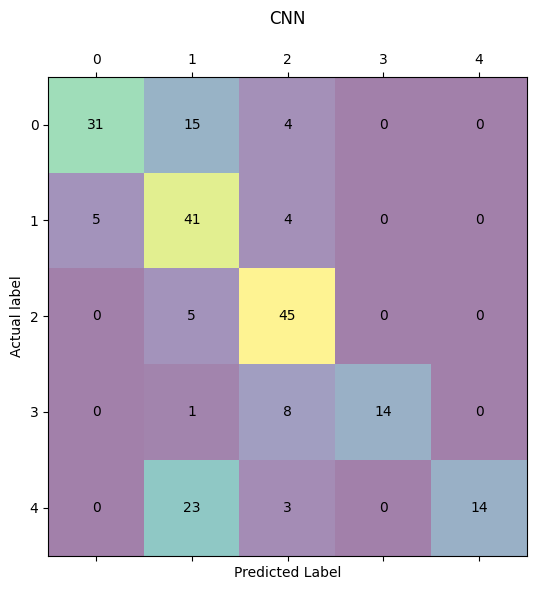

{0, 1, 2, 3, 4}
['Damask Rose' 'Echeveria Flower' 'Mirabilis Jalapa' 'Rain Lily'
 'Zinnia Elegans']


In [15]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, alpha=0.5)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted Label')
plt.ylabel('Actual label')

plt.tight_layout()
plt.show()

print(set(y))
print(lEncoder.classes_)

In [16]:

from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

Precision:  0.7761946132130473
Recall:  0.6807511737089202
F1-score:  0.6762286965021117


In [17]:
model2_TL.save("/content/drive/MyDrive/Deep Learning/Models/Model2_TL.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Saving the Training and the testing data
save("/content/drive/MyDrive/Deep Learning/Models/X_train2_std.npy",X_train_std)
save("/content/drive/MyDrive/Deep Learning/Models/X_test2_std.npy",X_test_std)
# Saving the y labels
save("/content/drive/MyDrive/Deep Learning/Models/y_train2.npy",y_train)
save("/content/drive/MyDrive/Deep Learning/Models/y_test2.npy",y_test)